In [1]:
import pandas as pd
import re

In [2]:
JOURNALS_DB_SOURCE = './output/SIOE_journals_1998_2019_8_2020-04-28.xlsx'
JOURNALS_DB_BOARD_SOURCE = './sources/BOARD_SIOE_ARTICLES_1998_2019_source.xlsx'

In [3]:
files = [f'./output/SIOE_journals_1998_2019_{index}_2020-04-30.xlsx' for index in range(2,9)]

In [4]:
df_articles_board = pd.read_excel(JOURNALS_DB_BOARD_SOURCE)

In [5]:
df_articles_board.head(2)

,Unnamed: 0,id,review,year,accept,title,jel,keywords,abstract,authors,affiliations,jel_clean,is_board
0,349,4118,American Economic Review,2017,NaN,Relational Knowledge Transfers,"['D82', 'D86', 'J24', 'M53']",Apprenticeship; Contracts; Human Capital; Trai...,We study how relational contracts mitigate Bec...,"Garicano, Luis; Rayo, Luis","IE Business School, Madrid and London School o...","['D82', 'D86', 'J24', 'M53']",1
1,375,4132,American Economic Review,2017,NaN,Team Incentives and Performance: Evidence from...,"['D22', 'J31', 'J33', 'L25', 'L81', 'M53', 'M54']",Bonus; Retail; Team; Wage,"In a field experiment with a retail chain (1,3...","Friebel, Guido; Heinz, Matthias; Krueger, Miri...","Goethe U Frankfurt and IZA, Bonn; U Cologne; D...","['D22', 'J31', 'J33', 'L25', 'M53', 'M54']",1


In [6]:
len(df_articles_board)

332

In [7]:
ids_board = list(df_articles_board.id)

In [8]:
ids_board[:3]

[4118, 4132, 3800]

In [9]:
df_stats = pd.read_excel('./output/stats.xlsx')

In [10]:
def percent_rejected(df):
    total = len(df)
    return len(df[df.accept == 'NO'])/total*100

In [11]:
for index, file in enumerate(files):
    df = pd.read_excel(file)
    df_filter = df[df.id.isin(ids_board)]
    df_stats.loc[index, 'percent_rejected_global'] = percent_rejected(df)
    df_stats.loc[index, 'percent_rejected_board'] = percent_rejected(df_filter)
    df_stats.loc[index, 'ratio_rejected'] = percent_rejected(df)/percent_rejected(df_filter)

In [12]:
df_stats.head(2)

,cursor,accepted,accepted_title,rejected,percent_rejected_global,percent_rejected_board,ratio_rejected
0,2,17599,138,4664,20.949558,3.915663,5.350195
1,3,16187,189,6076,27.291919,8.433735,3.236042


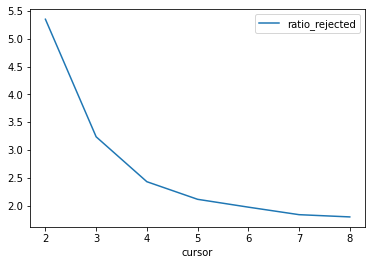

In [13]:
df_stats.plot(x ='cursor', y='ratio_rejected', kind = 'line')

In [14]:
df_stats.to_excel('./output/stats.xlsx')